In [1]:
# Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading csv file
d=pd.read_csv('Salary_mnc.csv')
d

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [3]:
# Creating DataFrame
df=pd.DataFrame(data=d)
df

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
Name        457 non-null object
Team        457 non-null object
Number      457 non-null int64
Position    457 non-null object
Age         457 non-null int64
DOJ         457 non-null object
Weight      457 non-null int64
College     373 non-null object
Salary      446 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [5]:
# Checking Null values
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

In [6]:
#Using Label Encoder to convert object data into binary data for further evaluation
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['Position','Team','College','DOJ']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [7]:
df

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,1,0,2,25,4,180,93,7730337.0
1,Jae Crowder,1,99,3,25,7,235,52,6796117.0
2,John Holland,1,30,4,27,9,205,8,NaN
3,R.J. Hunter,1,28,4,22,9,185,33,1148640.0
4,Jonas Jerebko,1,8,1,29,11,231,118,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,28,41,1,20,11,234,45,2239800.0
453,Shelvin Mack,28,8,2,26,8,203,11,2433333.0
454,Raul Neto,28,25,2,24,5,179,118,900000.0
455,Tibor Pleiss,28,21,0,26,15,256,118,2900000.0


In [8]:
dfa=df.drop('Name',axis=1)
dfa

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,1,0,2,25,4,180,93,7730337.0
1,1,99,3,25,7,235,52,6796117.0
2,1,30,4,27,9,205,8,NaN
3,1,28,4,22,9,185,33,1148640.0
4,1,8,1,29,11,231,118,5000000.0
...,...,...,...,...,...,...,...,...
452,28,41,1,20,11,234,45,2239800.0
453,28,8,2,26,8,203,11,2433333.0
454,28,25,2,24,5,179,118,900000.0
455,28,21,0,26,15,256,118,2900000.0


In [9]:
# Filling up NaN values with mean
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp=imputer.fit(dfa)
df_data=imp.fit_transform(dfa.values)
df_final=pd.DataFrame(data=df_data,columns=dfa.columns)
df_final

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,1.0,0.0,2.0,25.0,4.0,180.0,93.0,7.730337e+06
1,1.0,99.0,3.0,25.0,7.0,235.0,52.0,6.796117e+06
2,1.0,30.0,4.0,27.0,9.0,205.0,8.0,4.842684e+06
3,1.0,28.0,4.0,22.0,9.0,185.0,33.0,1.148640e+06
4,1.0,8.0,1.0,29.0,11.0,231.0,118.0,5.000000e+06
...,...,...,...,...,...,...,...,...
452,28.0,41.0,1.0,20.0,11.0,234.0,45.0,2.239800e+06
453,28.0,8.0,2.0,26.0,8.0,203.0,11.0,2.433333e+06
454,28.0,25.0,2.0,24.0,5.0,179.0,118.0,9.000000e+05
455,28.0,21.0,0.0,26.0,15.0,256.0,118.0,2.900000e+06


In [10]:
# Checking Skewness
df_final.skew()

Team       -0.007368
Number      1.668386
Position   -0.014795
Age         0.626349
DOJ         0.192022
Weight      0.113788
College    -0.127550
Salary      1.595511
dtype: float64

In [11]:
#Removing Skewness
for i in df_final.columns:
    if df_final.skew().loc[i]>0.55:
        df_final[i]=np.log1p(df_final[i])

In [12]:
df_final

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,1.0,0.000000,2.0,3.258097,4.0,180.0,93.0,15.860663
1,1.0,4.605170,3.0,3.258097,7.0,235.0,52.0,15.731862
2,1.0,3.433987,4.0,3.332205,9.0,205.0,8.0,15.392980
3,1.0,3.367296,4.0,3.135494,9.0,185.0,33.0,13.954090
4,1.0,2.197225,1.0,3.401197,11.0,231.0,118.0,15.424949
...,...,...,...,...,...,...,...,...
452,28.0,3.737670,1.0,3.044522,11.0,234.0,45.0,14.621898
453,28.0,2.197225,2.0,3.295837,8.0,203.0,11.0,14.704773
454,28.0,3.258097,2.0,3.218876,5.0,179.0,118.0,13.710151
455,28.0,3.091042,0.0,3.295837,15.0,256.0,118.0,14.880222


In [13]:
#checking skewness
df_final.skew()

Team       -0.007368
Number     -0.638011
Position   -0.014795
Age         0.284946
DOJ         0.192022
Weight      0.113788
College    -0.127550
Salary     -0.450091
dtype: float64

(8.0, 0.0)

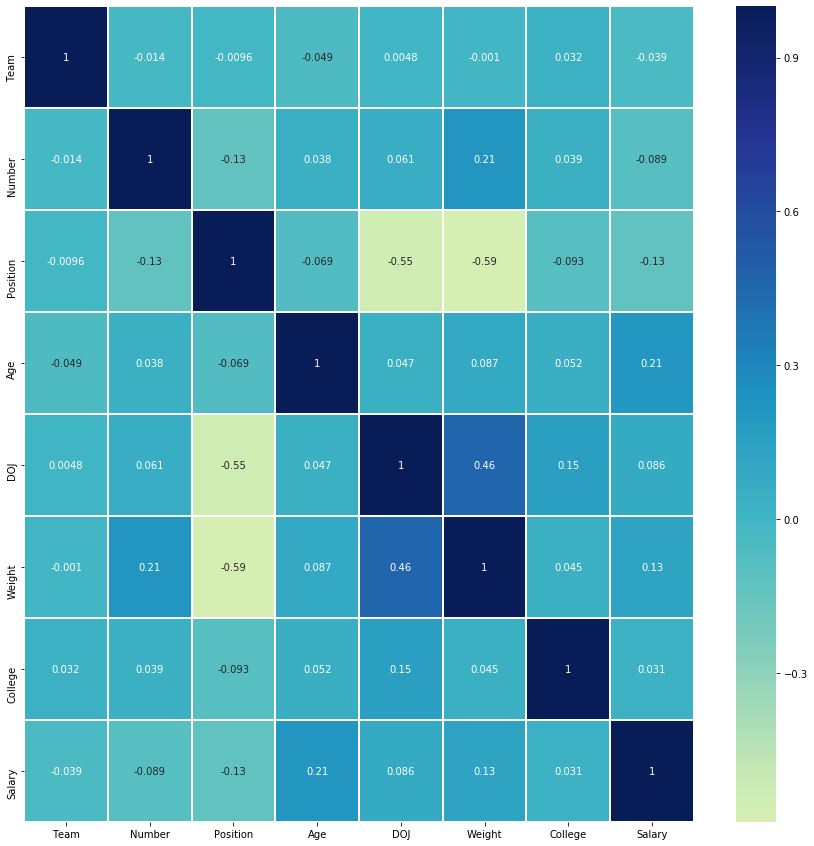

In [14]:
fig, ax =plt.subplots(figsize=(15,15))
sns.heatmap(df_final.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

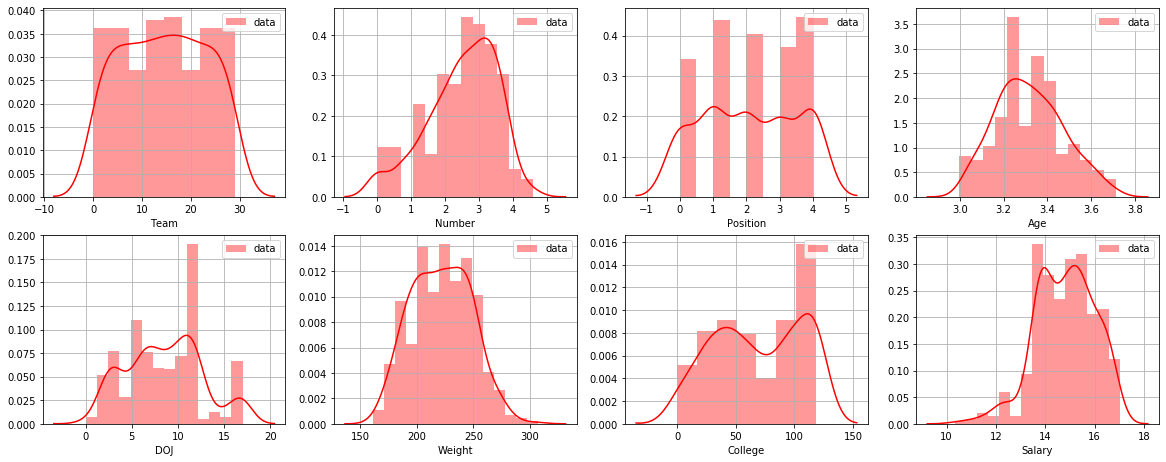

In [15]:
# Plotting Distplot
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_final.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_final[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

In [16]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df_final))
print(df_final.shape)
df_new=df_final.loc[(z<3).all(axis=1)]
print(df_new.shape)

(457, 8)
(453, 8)


In [17]:
df_new.skew()

Team        0.004596
Number     -0.626441
Position   -0.010839
Age         0.282998
DOJ         0.199554
Weight      0.058961
College    -0.118882
Salary     -0.278967
dtype: float64

(8.0, 0.0)

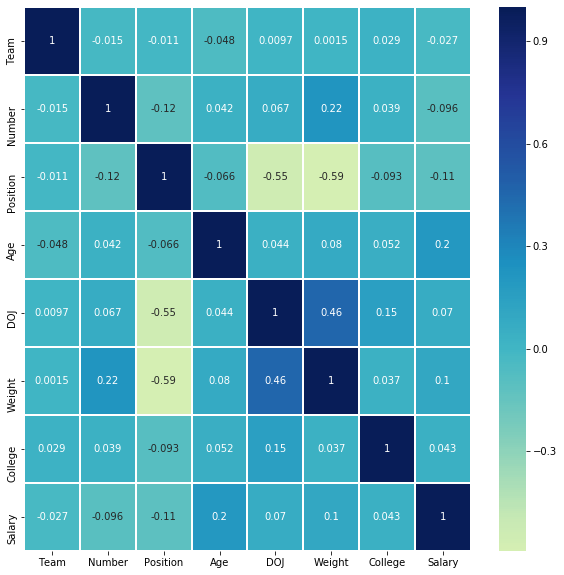

In [18]:
fig, ax =plt.subplots(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [19]:
y=df_new['Position']
y.shape

(453,)

In [20]:
x=df_new.drop(['Position'],axis=1)
x.shape


(453, 7)

### Using Grid Search

In [21]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,cv):
    clf = GridSearchCV(mod,parameters, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)

In [22]:
#     Grid Search for DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,10)


{'criterion': 'gini', 'max_depth': 4, 'random_state': 1}


In [23]:
#     Grid Search for GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(gbc,parameters,10)


{'learning_rate': 0.01, 'n_estimators': 100}


In [24]:
#     Grid Search for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,10)

{'n_neighbors': 18}


In [25]:
#     Grid Search for SVC
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4]}
grid_cv(svc,parameters,10)

{'gamma': 0.001, 'random_state': 1}


In [26]:
#     Grid Search for LogisticRegression
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_cv(lr,parameters,10)

{'C': 1000}


In [27]:
#     Grid Search for RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [100,200, 700,1000,2000],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,10)

{'max_features': 'sqrt', 'n_estimators': 100}


In [40]:
#           Defining Instances For Differnt Models.
KNN=KNeighborsClassifier(n_neighbors=18)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=1000)
DT=DecisionTreeClassifier(max_depth=4,random_state=1)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.01,n_estimators=100)
RF=RandomForestClassifier(max_features='sqrt',n_estimators= 100,)

In [41]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
       # print('r2 score corresponding to random state ',r_state,'is: ',acc_score)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [42]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))

In [43]:
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
    score=model.score(x_test, y_test)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    print('\n')
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
    
#roc auc score    
    #false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
   # roc_auc=auc(false_positive_rate, true_positive_rate)
   # print('roc auc score : ', roc_auc)
    #rocscore.append(roc_auc*100)
   # print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    #plt.figure(figsize=(10,40))
    #plt.subplot(911)
    #plt.title(name)
    #plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    #plt.plot([0,1],[0,1],'r--')
    #plt.legend(loc='lower right')
    #plt.ylabel('True_positive_rate')
    #plt.xlabel('False_positive_rate')
    print('\n\n')
    
    
    
    

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  91 is: 0.65


Learning Score :  0.65
Accuracy Score :  0.65


Cross Val Score :  0.5619285243741766


Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.59      0.65        17
         1.0       0.58      0.64      0.61        22
         2.0       0.71      1.00      0.83        20
         3.0       0.56      0.53      0.54        19
         4.0       0.69      0.50      0.58        22

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.64       100
weighted avg       0.65      0.65      0.64       100



Confusion Matrix:
 [[10  7  0  0  0]
 [ 4 14  0  4  0]
 [ 0  0

In [44]:
#coclusion
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'Accuracy Score':Acc_score,'Cross Val Score':cvs})  
result

,Model,Learning Score,Accuracy Score,Cross Val Score
0,KNeighborsClassifier,65.0,65.0,56.192852
1,SVC,68.0,68.0,57.769433
2,LogisticRegression,64.0,64.0,52.515975
3,DecisionTreeClassifier,78.0,78.0,64.550450
4,GaussianNB,66.0,66.0,57.230018
5,GradientBoostingClassifier,77.0,77.0,66.894763
6,RandomForestClassifier,75.0,75.0,65.430061


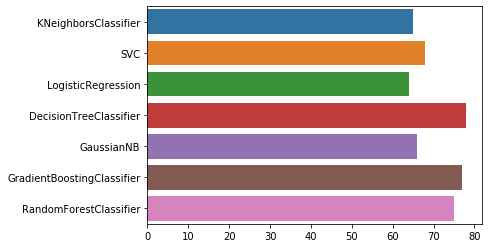

In [45]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

### After all this process conclusion is that DecisionTreeClassifier is performing well.

In [46]:
#Using DecisionTreeClassifier because it is having highest value
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=72,test_size=.22,stratify=y)
dt=DecisionTreeClassifier(max_depth=4,random_state=1)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
dtpred=dt.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,dtpred))
print('Confusion Matrix:',confusion_matrix(y_test,dtpred))
print('Classification Report:',classification_report(y_test,dtpred))

Accuracy Score: 0.78
Confusion Matrix: [[14  3  0  0  0]
 [ 1 19  0  2  0]
 [ 0  0 19  0  1]
 [ 0  2  1 11  5]
 [ 0  1  5  1 15]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.93      0.82      0.87        17
         1.0       0.76      0.86      0.81        22
         2.0       0.76      0.95      0.84        20
         3.0       0.79      0.58      0.67        19
         4.0       0.71      0.68      0.70        22

    accuracy                           0.78       100
   macro avg       0.79      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



In [52]:
#As i am getting highest accuracy score for DecisionTreeClassifier thus using adabooster for the same.
from sklearn.ensemble import AdaBoostClassifier
dt=DecisionTreeClassifier(max_depth=4,random_state=1)
ad = AdaBoostClassifier(n_estimators=100, base_estimator=rf)
ad.fit(x, y)
ad.score(x_train,y_train)
adpred=ad.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,adpred),'\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,adpred),'\n')
print('Classification Report:','\n',classification_report(y_test,adpred))



Accuracy Score: 1.0 

Confusion Matrix: 
 [[17  0  0  0  0]
 [ 0 22  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 22]] 

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        22
         2.0       1.00      1.00      1.00        20
         3.0       1.00      1.00      1.00        19
         4.0       1.00      1.00      1.00        22

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



(5.0, 0.0)

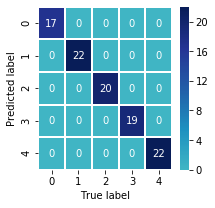

In [53]:
# Plotting Confusion matrix
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, adpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [54]:
test=pd.DataFrame(data=y_test)
test['ypred']=adpred
test

,Position,ypred
19,2.0,2.0
199,3.0,3.0
320,3.0,3.0
37,2.0,2.0
7,0.0,0.0
...,...,...
441,1.0,1.0
84,2.0,2.0
285,4.0,4.0
418,0.0,0.0


In [55]:
from sklearn.externals import joblib
joblib.dump(ad,'Salary_Mnc_Dataset.pkl')

['Salary_Mnc_Dataset.pkl']

In [56]:
final=joblib.load('Salary_Mnc_Dataset.pkl')
final.predict(x_test)


array([2., 3., 3., 2., 0., 4., 2., 0., 3., 4., 0., 1., 1., 1., 2., 0., 2.,
       4., 4., 3., 2., 1., 1., 3., 1., 4., 2., 4., 4., 2., 1., 4., 1., 0.,
       3., 4., 0., 3., 2., 3., 1., 2., 0., 0., 3., 3., 1., 4., 1., 1., 1.,
       2., 0., 1., 1., 0., 2., 2., 3., 3., 1., 1., 4., 0., 3., 4., 3., 0.,
       4., 4., 3., 0., 4., 0., 2., 2., 2., 3., 1., 1., 4., 1., 1., 3., 3.,
       2., 0., 0., 4., 4., 4., 2., 4., 2., 4., 1., 2., 4., 0., 3.])